# Time Series Forecasting for Air Quality Parameters


This notebook creates a time series forecasting model for predicting the next 8 hours based on historical data. The parameters being forecasted are `d_pm10`, `d_pm2p5`, `no2`, `so2`, `co`, and `o3`.
    
### Libraries
We use the following libraries:
- pandas: for data manipulation
- matplotlib: for visualizing the data
- sklearn: for data splitting
- statsmodels or fbprophet: for time series forecasting (we will use ARIMA or Prophet)
    

In [8]:
import requests
import pandas as pd

In [10]:
data = requests.get("https://blogcontent.site/projects/aqi24.php").json()
print(data)

[{'date': '2024-09-15', 'hour': '17:00', 'd_pm10': 18, 'd_pm2p5': 29.434, 'pm10': 18, 'o3': 6, 'no2': 4, 'so2': 2, 'co': 11}, {'date': '2024-09-15', 'hour': '18:00', 'd_pm10': 18, 'd_pm2p5': 29.133, 'pm10': 18, 'o3': 6, 'no2': 4, 'so2': 2, 'co': 11}, {'date': '2024-09-15', 'hour': '19:00', 'd_pm10': 28, 'd_pm2p5': 25.989, 'pm10': 28, 'o3': 5, 'no2': 7, 'so2': 2, 'co': 11}, {'date': '2024-09-15', 'hour': '20:00', 'd_pm10': 42, 'd_pm2p5': 32.737, 'pm10': 42, 'o3': 0, 'no2': 7, 'so2': 3, 'co': 23}, {'date': '2024-09-15', 'hour': '21:00', 'd_pm10': 42, 'd_pm2p5': 38.622, 'pm10': 42, 'o3': 0, 'no2': 8, 'so2': 8, 'co': 21}, {'date': '2024-09-15', 'hour': '22:00', 'd_pm10': 52, 'd_pm2p5': 43.255, 'pm10': 52, 'o3': 0, 'no2': 9, 'so2': 2, 'co': 24}, {'date': '2024-09-15', 'hour': '23:00', 'd_pm10': 53, 'd_pm2p5': 39.253, 'pm10': 53, 'o3': 0, 'no2': 8, 'so2': 2, 'co': 23}, {'date': '2024-09-16', 'hour': '0:00', 'd_pm10': 56, 'd_pm2p5': 37.49, 'pm10': 56, 'o3': 0, 'no2': 8, 'so2': 3, 'co': 22}, {

In [12]:
df = pd.DataFrame(data)

# Combine date and hour into a single DateTime column
df['DateTime'] = pd.to_datetime(df['date'] + ' ' + df['hour'])

# Set DateTime as the index
df.set_index('DateTime', inplace=True)

# Drop unnecessary columns ('date' and 'hour')
df.drop(columns=['date', 'hour', 'pm10'], inplace=True)

# Display the DataFrame to ensure correct format
df.tail()

,d_pm10,d_pm2p5,o3,no2,so2,co
DateTime,,,,,,
2024-09-16 19:00:00,47,28.288,3,7,2,15
2024-09-16 20:00:00,52,33.323,0,9,2,21
2024-09-16 21:00:00,52,35.147,0,11,2,27
2024-09-16 22:00:00,66,39.249,0,11,3,29
2024-09-16 23:00:00,68,38.993,0,11,3,29


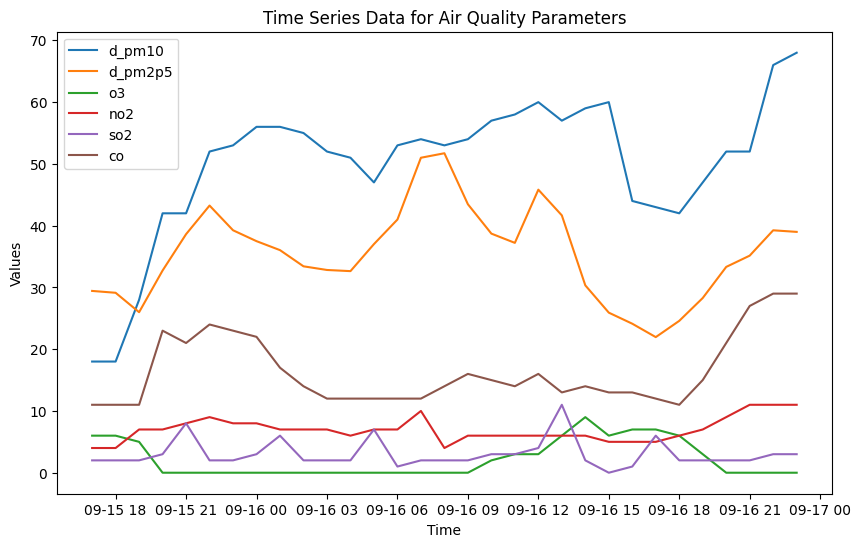

In [13]:
import matplotlib.pyplot as plt

# Plot the time series for each column
plt.figure(figsize=(10, 6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.legend()
plt.title('Time Series Data for Air Quality Parameters')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

In [14]:
# Define the train-test split
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

train_data.shape, test_data.shape

((24, 6), (7, 6))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


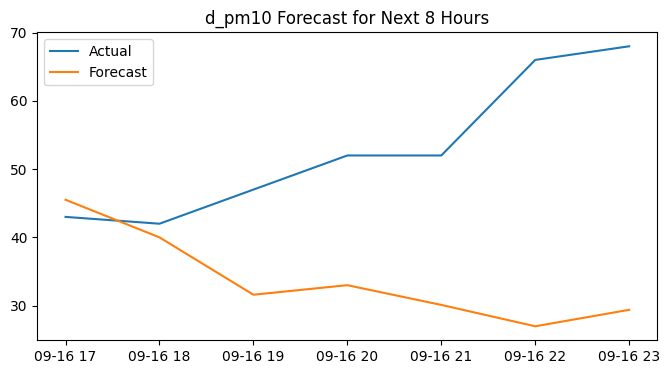

RMSE for d_pm10: 24.21


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def arima_forecast(train, test, param_name, steps=8):
    # Fit ARIMA model (Adjust the (p, d, q) parameters as needed)
    model = ARIMA(train, order=(5, 1, 0))  # ARIMA(p, d, q)
    model_fit = model.fit()

    # Forecast for the next `steps` hours
    forecast = model_fit.forecast(steps=steps)

    # Adjust the length of test and forecast to match the shorter one
    min_len = min(len(test), len(forecast))
    forecast = forecast[:min_len]
    test = test[:min_len]

    # Plot the forecast vs actual data
    plt.figure(figsize=(8, 4))
    plt.plot(test.index, test, label='Actual')  # Plot actual test data
    plt.plot(test.index, forecast, label='Forecast')  # Plot forecasted data
    plt.title(f'{param_name} Forecast for Next {steps} Hours')
    plt.legend()
    plt.show()

    # Calculate and print RMSE (Root Mean Squared Error)
    error = mean_squared_error(test, forecast)
    print(f'RMSE for {param_name}:', round(np.sqrt(error), 2))

    return forecast

# Example for d_pm10
forecast_d_pm10 = arima_forecast(train_data['d_pm10'], test_data['d_pm10'], 'd_pm10')


In [18]:
print(forecast_d_pm10)

2024-09-16 17:00:00    45.512296
2024-09-16 18:00:00    39.999223
2024-09-16 19:00:00    31.595925
2024-09-16 20:00:00    32.993963
2024-09-16 21:00:00    30.102311
2024-09-16 22:00:00    26.971734
2024-09-16 23:00:00    29.382447
Freq: h, Name: predicted_mean, dtype: float64


In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data['d_pm10'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("The data is non-stationary. Consider differencing.")
else:
    print("The data is stationary.")


ADF Statistic: -3.0569878071964136
p-value: 0.029904409315918982
The data is stationary.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56211D+00    |proj g|=  5.62426D+00

At iterate    5    f=  1.55279D+00    |proj g|=  5.12574D-02

At iterate   10    f=  1.52487D+00    |proj g|=  6.63905D-02

At iterate   15    f=  1.51352D+00    |proj g|=  1.55508D-02

At iterate   20    f=  1.50375D+00    |proj g|=  3.71865D-02

At iterate   25    f=  1.49546D+00    |proj g|=  1.30605D-02


 This problem is unconstrained.



At iterate   30    f=  1.49175D+00    |proj g|=  9.06619D-03

At iterate   35    f=  1.49057D+00    |proj g|=  7.90752D-03

At iterate   40    f=  1.49021D+00    |proj g|=  2.17476D-02

At iterate   45    f=  1.48919D+00    |proj g|=  5.81117D-03

At iterate   50    f=  1.48873D+00    |proj g|=  1.22320D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58      1     0     0   1.223D-02   1.489D+00
  F =   1.4887315322850647     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


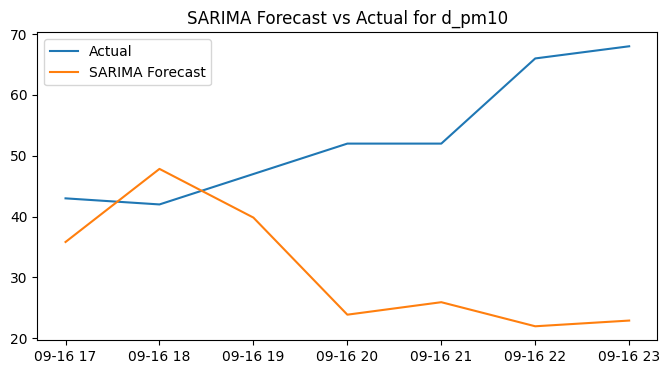

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example SARIMA model
sarima_model = SARIMAX(train_data['d_pm10'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()

import matplotlib.pyplot as plt

# Get the forecast for the next 8 hours
forecast_sarima = sarima_model_fit.forecast(steps=8)

# Find the minimum length between test data and forecast to match dimensions
min_len = min(len(test_data['d_pm10'][:8]), len(forecast_sarima))

# Slice both test data and forecast based on the minimum length
test_slice = test_data['d_pm10'][:min_len]
forecast_slice = forecast_sarima[:min_len]

# Plot the forecast vs actual data
plt.figure(figsize=(8, 4))
plt.plot(test_data.index[:min_len], test_slice, label='Actual')  # Actual test data
plt.plot(test_data.index[:min_len], forecast_slice, label='SARIMA Forecast')  # SARIMA forecast
plt.title('SARIMA Forecast vs Actual for d_pm10')
plt.legend()
plt.show()

